In [6]:
import skimage
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import io 

In [8]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

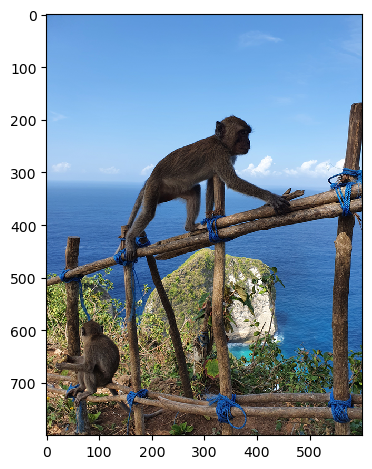

In [9]:
data_dir = './data/'
img_name = 'NusaPenida.png'
img_org = io.imread(data_dir + img_name)
io.imshow(img_org)

### Exercise 1: image rotation

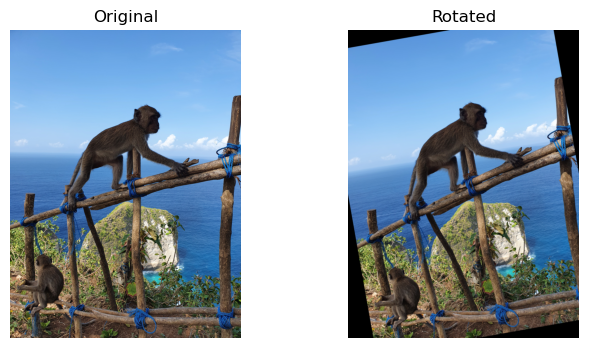

In [10]:
#Angle in degrees, counter clockwise
rotation_angle = 10
rotated_img = rotate(img_org, rotation_angle)
show_comparison(img_org, rotated_img, 'Rotated')

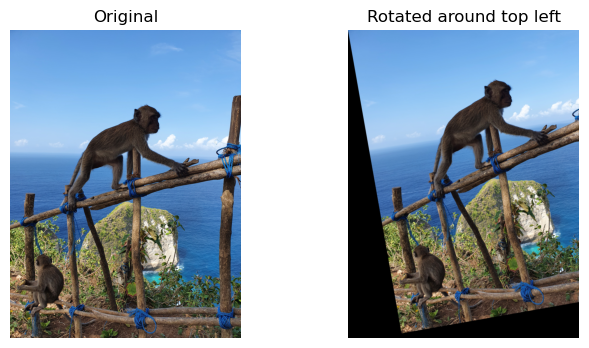

In [11]:
rot_center = [0, 0]
rotated_img = rotate(img_org, rotation_angle, center=rot_center)
show_comparison(img_org, rotated_img, 'Rotated around top left')

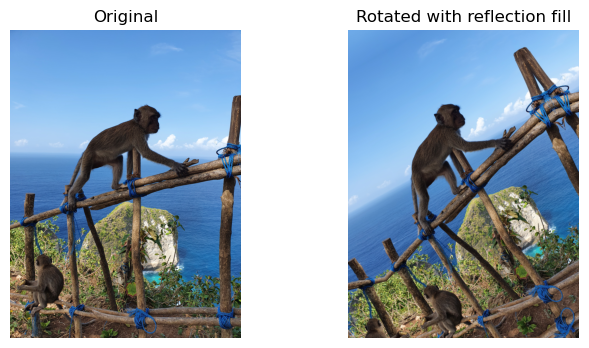

In [12]:
rotation_angle = 30
rotated_img = rotate(img_org, rotation_angle, mode="reflect")
show_comparison(img_org, rotated_img, 'Rotated with reflection fill')

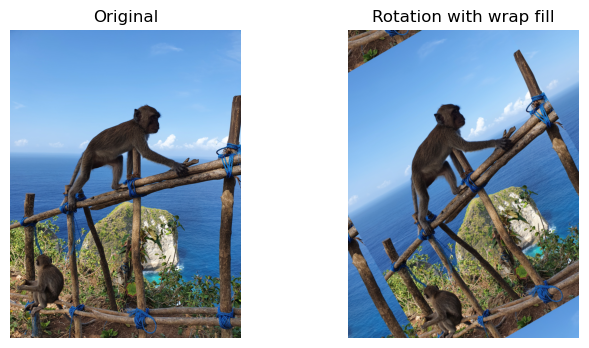

In [13]:
rotated_img = rotate(img_org, rotation_angle, mode="wrap")
show_comparison(img_org, rotated_img, 'Rotation with wrap fill')

### Ex4 cval
Fill background with a single value

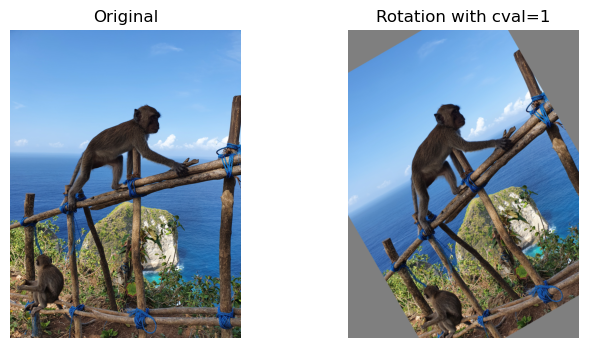

In [14]:
rotated_img = rotate(img_org, rotation_angle, mode="constant", cval=0.5)
show_comparison(img_org, rotated_img, 'Rotation with cval=1')

### Exercise 5
Automatic resizing to adjust output size in order not to crop rotated image

Rotated image shape: (992, 919, 3)
Original image shape: (800, 600, 3)


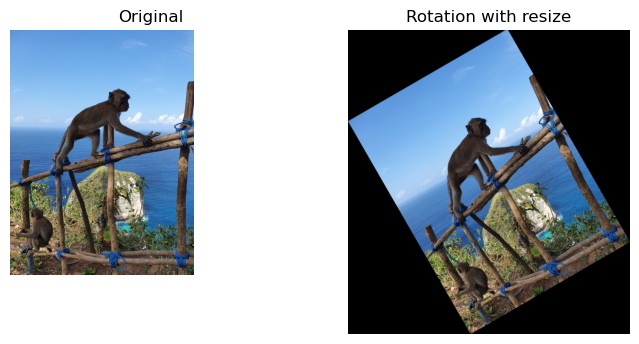

In [15]:
rotated_img = rotate(img_org, rotation_angle, resize=True)
print(f"Rotated image shape: {rotated_img.shape}")
print(f"Original image shape: {img_org.shape}")
show_comparison(img_org, rotated_img, 'Rotation with resize')

### Transformation by applying functions to pixels

**Exercise 6, rigid body transformation (Rotation & translation)**

In [16]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


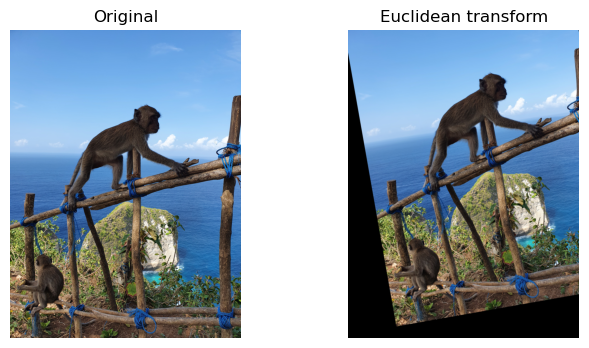

In [17]:
transformed_img = warp(img_org, tform)
show_comparison(img_org, transformed_img, 'Euclidean transform')

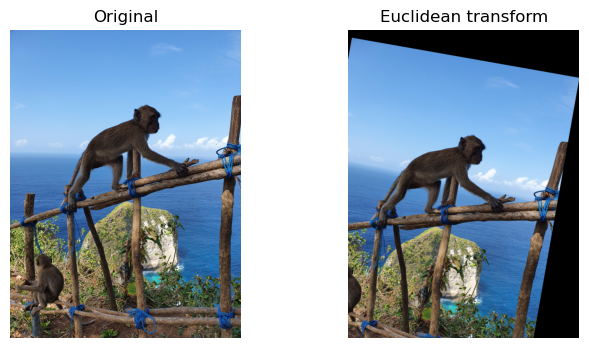

In [18]:
transformed_img = warp(img_org, tform.inverse)
show_comparison(img_org, transformed_img, 'Euclidean transform')

### Construct a transform only rotation

In [19]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
tform = EuclideanTransform(rotation=rotation_angle)
print(tform.params)

[[ 0.98480775 -0.17364818  0.        ]
 [ 0.17364818  0.98480775  0.        ]
 [ 0.          0.          1.        ]]


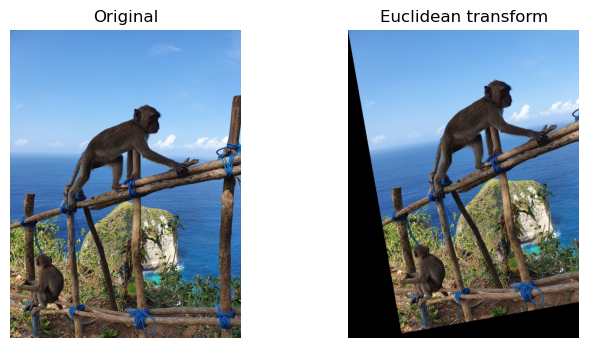

In [20]:
transformed_img = warp(img_org, tform)
show_comparison(img_org, transformed_img, 'Euclidean transform')

### Similarity transform of image
The SimilarityTransform computes a transformation consisting of a translation, rotation and a scaling.

Define a SimilarityTransform with an angle of 15, a translation of (40, 30) and a scaling of 0.6 and test it on the image.

In [21]:
rotation_angle = 15.0 * math.pi / 180.
trans = [40,30]
scaling = 0.6
sform = SimilarityTransform(rotation=rotation_angle, translation=trans, scale=scaling)

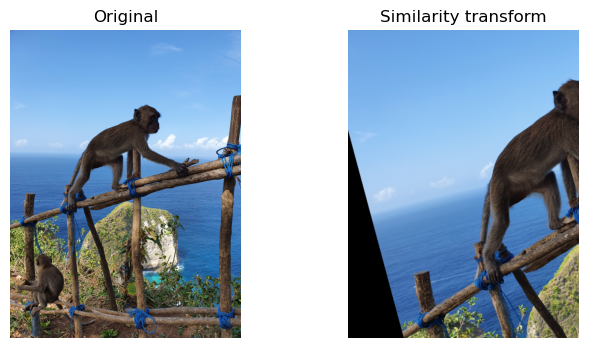

In [22]:
transformed_img = warp(img_org, sform)
show_comparison(img_org, transformed_img, 'Similarity transform')

### Ex 10 Swirl


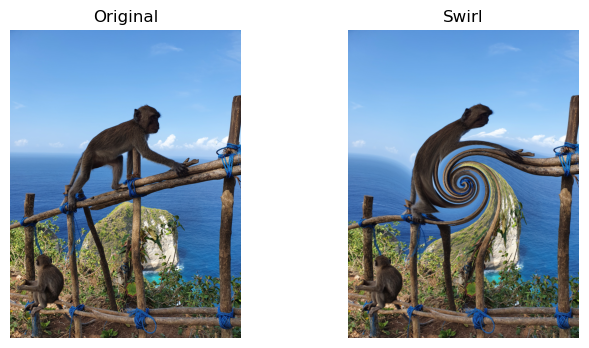

In [23]:
str = 10
rad = 300
swirl_img = swirl(img_org, strength=str, radius=rad)
show_comparison(img_org, swirl_img, 'Swirl')

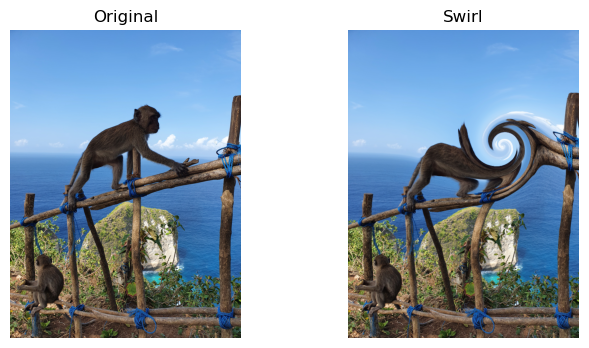

In [24]:
str = 10
rad = 300
c = [400, 300]
swirl_img = swirl(img_org, strength=str, radius=rad, center=c)
show_comparison(img_org, swirl_img, 'Swirl')

# Landmark based registration
The goal of landmark based registration is to align two images using a set of landmarks placed in both images. The landmarks need to have correspondence meaning that the landmarks should be placed on the same anatomical spot in the two images.

There are two photos of hands: Hand1.jpg and Hand2.jpg and the goal is to transform Hand1 so it fits on top of Hand2. In this exercise we call Hand1 one for the source (src) and Hand2 for the destination (dst).

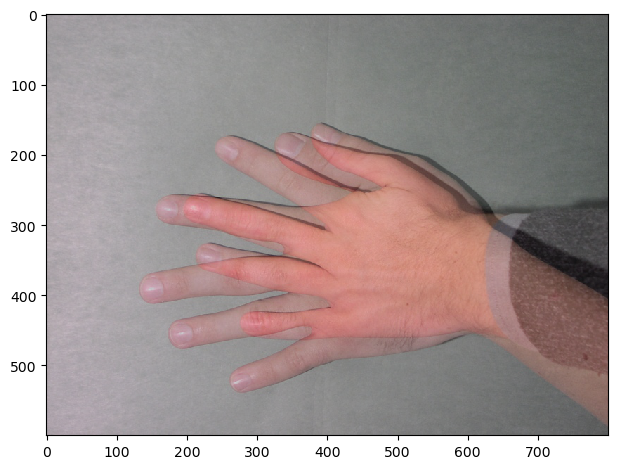

In [47]:
from skimage import img_as_float
src_img = io.imread(data_dir + 'Hand1.jpg')
dst_img = io.imread(data_dir + 'Hand2.jpg')
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

### Exercise 12
Manually plced landmarks

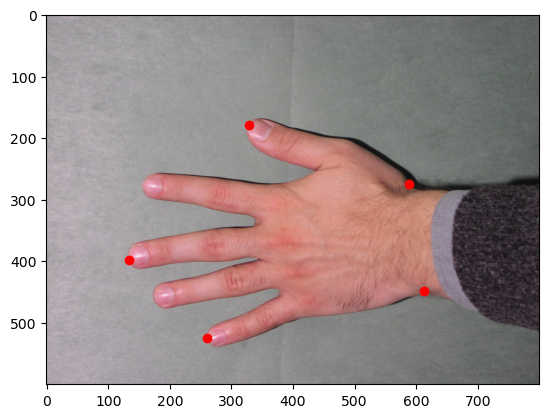

In [29]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

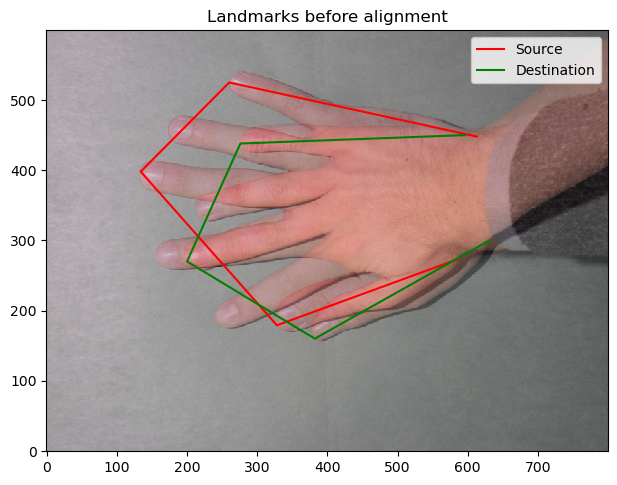

In [33]:
dst = np.array([[631, 300], [382, 160], [200, 270], [276, 438], [596, 450]])


fig, ax = plt.subplots()
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

### Exercise 14
Compute the objetive function

In [34]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 34660


The optimal Euclidean transformation that brings the source landmarks over in the destination landmarks can be found by:

In [41]:
tform = EuclideanTransform()
tform.estimate(src, dst)
from skimage.transform import matrix_transform

src_transform = matrix_transform(src, tform.params)

src_transform

array([[637.25266036, 290.35897707],
       [412.02354976, 129.43400158],
       [166.62609337, 288.73587978],
       [254.17485877, 444.74938457],
       [614.92283775, 464.721757  ]])

In [42]:
transf_img = warp(src_img, tform.inverse)

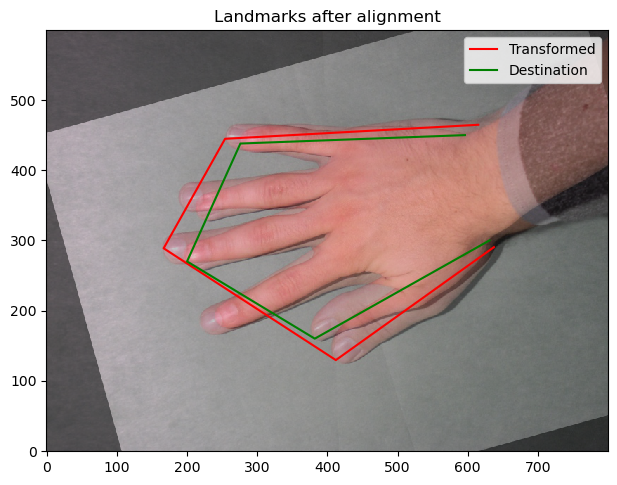

In [44]:

fig, ax = plt.subplots()
blend = 0.5 * img_as_float(transf_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Transformed")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks after alignment")
plt.show()

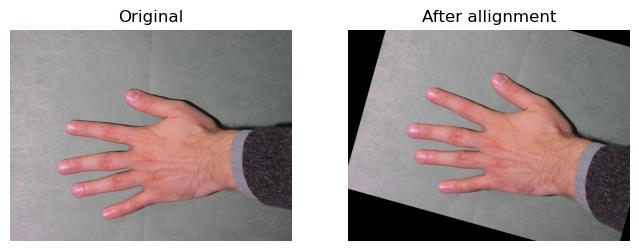

In [45]:
show_comparison(src_img, transf_img, 'After allignment')

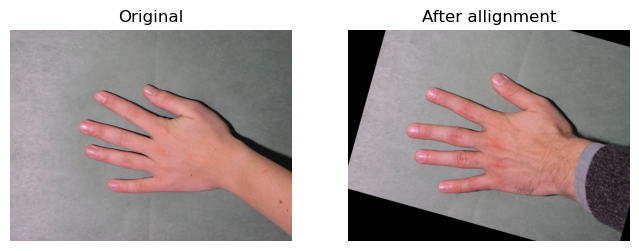

In [48]:
show_comparison(dst_img, transf_img, 'After allignment')